
# <p style="text-align: center;">Weather and Decrees</p>

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import glob
import os

import requests

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import zipfile

import xarray as xr

import folium
from folium.plugins import MarkerCluster

import pandas as pd
from geopy.geocoders import Nominatim

import geopandas as gpd
import cartopy.crs as ccrs

import imageio

from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree

## Set parameters

In [2]:
decree_filename_base = 'arrete_'
decrees_folder_name = './../../data/raw/decrees'
communes_folder_name = './../../data/raw/opendatasoft'
weather_folder_name = './../../data/raw/weather/era5'
weather_ncfiles_folder_name = './../../data/raw/weather/era5/ncfiles'
processed_data_folder_name = './../../data/processed'
maps_folder_name = './../../data/processed/maps'
decrees_filename = 'decrees.parquet'
decrees_locations_filename = 'decrees_locations.parquet'
communes_csv_filename = 'correspondance-code-insee-code-postal.csv'
weather_filename = 'weather.parquet'
weather_shema = 'weather_shema.csv'
weather_decrees_filename = 'weather_decrees.parquet'
weather_decrees_shema = 'weather_decrees.csv'
#weather_zip_file = "193fcd51a8958175843ecbbcaba057c8.zip"

## Load Weather data

| Column    | Description                                      |
|-----------|--------------------------------------------------|
| date      | The date of the observation.                     |
| latitude  | The latitude coordinate of the observation point.|
| longitude | The longitude coordinate of the observation point.|
| number    | A unique identifier for the observation.         |
| expver    | Experiment version number.                       |
| u10       | 10-meter U-component of wind (eastward wind).    |
| v10       | 10-meter V-component of wind (northward wind).   |
| t2m       | 2-meter temperature (air temperature at 2 meters above the surface).|
| sp        | Surface pressure.                                |
| tp        | Total precipitation.                             |
| e         | Evaporation.                                     |
| sro       | Surface runoff.                                  |
| tcrw      | Total column water vapor.                        |
| stl1      | Soil temperature level 1.                        |
| stl2      | Soil temperature level 2.                        |
| slt       | Soil type.                                       |
| swvl1     | Volumetric soil water layer 1.                   |
| swvl2     | Volumetric soil water layer 2.                   |
| cvh       | High vegetation cover.                           |
| cvl       | Low vegetation cover.                            |
| tvh       | High vegetation type.                            |
| tvl       | Low vegetation type.                             |


In [3]:
df_weather = pd.read_parquet(os.path.join(processed_data_folder_name, weather_filename))

In [4]:
df_weather.head()

,date,latitude,longitude,u10,v10,t2m,sp,tp,e,sro,...,stl2_ref,stl2_delta,swvl1_ref,swvl1_delta,swvl2_ref,swvl2_delta,cvh_ref,cvh_delta,cvl_ref,cvl_delta
0,1990-01-01,52.0,-5.00,4.854118,5.280374,8.799219,100561.1875,0.004912,-0.001651,0.000077,...,7.683729,0.991223,0.181401,0.004813,0.183043,0.004298,0.000000,0.0,0.000000,0.0
1,1990-01-01,52.0,-4.75,4.120720,4.837014,8.308984,100306.1875,0.005552,-0.001413,0.000115,...,7.158245,1.067487,0.182581,0.005693,0.184108,0.005095,0.000000,0.0,0.000000,0.0
2,1990-01-01,52.0,-4.50,2.978630,3.999124,7.713281,99834.1875,0.005424,-0.000871,0.000253,...,5.189123,1.667469,0.390516,0.011213,0.393872,0.010266,0.444855,0.0,0.294592,0.0
3,1990-01-01,52.0,-4.25,2.781364,3.996194,7.287500,99420.1875,0.006426,-0.000815,0.000324,...,4.860905,1.640218,0.391713,0.013297,0.394828,0.012148,0.236176,0.0,0.737630,0.0
4,1990-01-01,52.0,-4.00,2.592888,3.729104,6.516016,98529.1875,0.007340,-0.000660,0.000378,...,4.296824,1.575393,0.393440,0.015369,0.396205,0.014235,0.440437,0.0,0.559563,0.0


In [5]:
df_weather.columns

Index(['date', 'latitude', 'longitude', 'u10', 'v10', 't2m', 'sp', 'tp', 'e',
       'sro', 'tcrw', 'stl1', 'stl2', 'slt', 'swvl1', 'swvl2', 'cvh', 'cvl',
       'tvh', 'tvl', 'month', 'year', 'u10_ref', 'u10_delta', 'v10_ref',
       'v10_delta', 't2m_ref', 't2m_delta', 'sp_ref', 'sp_delta', 'tp_ref',
       'tp_delta', 'e_ref', 'e_delta', 'sro_ref', 'sro_delta', 'tcrw_ref',
       'tcrw_delta', 'stl1_ref', 'stl1_delta', 'stl2_ref', 'stl2_delta',
       'swvl1_ref', 'swvl1_delta', 'swvl2_ref', 'swvl2_delta', 'cvh_ref',
       'cvh_delta', 'cvl_ref', 'cvl_delta'],
      dtype='object')

In [6]:
df_weather.dtypes

date           datetime64[ns]
latitude              float64
longitude             float64
u10                   float32
v10                   float32
t2m                   float64
sp                    float32
tp                    float32
e                     float32
sro                   float32
tcrw                  float32
stl1                  float64
stl2                  float64
slt                   float64
swvl1                 float32
swvl2                 float32
cvh                   float32
cvl                   float32
tvh                   float64
tvl                   float64
month                   int32
year                    int32
u10_ref               float32
u10_delta             float32
v10_ref               float32
v10_delta             float32
t2m_ref               float64
t2m_delta             float64
sp_ref                float32
sp_delta              float32
tp_ref                float32
tp_delta              float32
e_ref                 float32
e_delta   

In [7]:
# Load the schema (data types) from the file
schema = pd.read_csv(os.path.join(processed_data_folder_name, weather_shema), index_col=0).squeeze("columns")

In [8]:
# Apply the schema to the loaded dataframe
df_weather = df_weather.astype(schema.to_dict())

In [9]:
df_weather.dtypes

date           datetime64[ns]
latitude              float64
longitude             float64
u10                   float32
v10                   float32
t2m                   float64
sp                    float32
tp                    float32
e                     float32
sro                   float32
tcrw                  float32
stl1                  float64
stl2                  float64
slt                    object
swvl1                 float32
swvl2                 float32
cvh                   float32
cvl                   float32
tvh                    object
tvl                    object
month                   int32
year                    int32
u10_ref               float32
u10_delta             float32
v10_ref               float32
v10_delta             float32
t2m_ref               float64
t2m_delta             float64
sp_ref                float32
sp_delta              float32
tp_ref                float32
tp_delta              float32
e_ref                 float32
e_delta   

In [10]:
print(df_weather.isna().sum())  # Count missing values

date           0
latitude       0
longitude      0
u10            0
v10            0
t2m            0
sp             0
tp             0
e              0
sro            0
tcrw           0
stl1           0
stl2           0
slt            0
swvl1          0
swvl2          0
cvh            0
cvl            0
tvh            0
tvl            0
month          0
year           0
u10_ref        0
u10_delta      0
v10_ref        0
v10_delta      0
t2m_ref        0
t2m_delta      0
sp_ref         0
sp_delta       0
tp_ref         0
tp_delta       0
e_ref          0
e_delta        0
sro_ref        0
sro_delta      0
tcrw_ref       0
tcrw_delta     0
stl1_ref       0
stl1_delta     0
stl2_ref       0
stl2_delta     0
swvl1_ref      0
swvl1_delta    0
swvl2_ref      0
swvl2_delta    0
cvh_ref        0
cvh_delta      0
cvl_ref        0
cvl_delta      0
dtype: int64


In [11]:
# Check for missing values
missing_values = df_weather.isna().sum()
# Print columns with missing values
columns_with_null = missing_values[missing_values > 0].index.tolist()
print("Columns with null values:", columns_with_null)

Columns with null values: []


### Note

>There are no missing values in weather data because they come from monthly ERA5 simulations based on real data.

## Import Decrees

In [12]:


df_decrees = pd.read_parquet(os.path.join(processed_data_folder_name, decrees_locations_filename))

In [13]:
df_decrees.head()

,insee,nom_commune,debut_evenement,fin_evenement,date_arrete,date_parution_jo,nom_peril,code_peril,franchise,code_nor,...,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Département,Code Région
12,12018,BALAGUIER D OLT,1990-01-01,1990-09-30,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,1098.0,0.1,"44.5189126443148, 1.9771926377212372","{""coordinates"": [[[1.989175719192402, 44.49934...",15146.0,18.0,6.0,3.0,12,73.0
13,12018,BALAGUIER D OLT,1992-03-01,1992-06-30,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,1098.0,0.1,"44.5189126443148, 1.9771926377212372","{""coordinates"": [[[1.989175719192402, 44.49934...",15146.0,18.0,6.0,3.0,12,73.0
14,14555,SAINT ANDRE D HEBERTOT,2000-11-06,2000-11-11,2001-11-15,2001-12-01,Mouvement de Terrain,MVT,Simple,INTE0100649A,...,988.0,0.5,"49.30322090380799, 0.291910061831684","{""coordinates"": [[[0.30899812835816304, 49.283...",5555.0,555.0,5.0,3.0,14,25.0
15,14755,VILLERVILLE,2001-03-21,2001-03-23,2001-11-15,2001-12-01,Mouvement de Terrain,MVT,Simple,INTE0100649A,...,342.0,0.8,"49.39087631534191, 0.123148235678736","{""coordinates"": [[[0.127262288895329, 49.37693...",14618.0,755.0,35.0,3.0,14,25.0
16,17118,CORIGNAC,1989-05-01,1989-12-31,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,1112.0,0.3,"45.244860498269, -0.39280322020985503","{""coordinates"": [[[-0.41318672381903404, 45.22...",27409.0,118.0,17.0,1.0,17,54.0


## Data Recording Period 

In [14]:
df_decrees.describe()

,debut_evenement,fin_evenement,date_arrete,date_parution_jo,Altitude Moyenne,Superficie,Population,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Région
count,221644,221644,221644,221644,221644.000000,2.216440e+05,221644.000000,221644.000000,221644.000000,221644.000000,221644.000000,221644.000000
mean,2005-11-10 03:19:10.926711168,2006-02-16 10:27:57.890671488,2006-08-06 20:27:42.428037888,2006-08-18 15:24:08.744834048,210.044459,1.818752e+03,3.692151,17565.904870,239.771760,22.711853,2.292469,52.248579
min,1985-05-12 00:00:00,1985-05-15 00:00:00,1987-06-24 00:00:00,1987-07-10 00:00:00,0.000000,2.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1999-12-25 00:00:00,1999-12-29 00:00:00,1999-12-29 00:00:00,1999-12-30 00:00:00,80.000000,7.270000e+02,0.300000,8120.000000,100.000000,10.000000,1.000000,26.000000
50%,2003-07-01 00:00:00,2003-09-22 00:00:00,2003-12-12 00:00:00,2003-12-13 00:00:00,143.000000,1.234000e+03,0.700000,17138.000000,207.000000,19.000000,2.000000,53.000000
75%,2016-01-01 00:00:00,2016-03-31 00:00:00,2016-09-16 00:00:00,2016-10-20 00:00:00,252.000000,2.152000e+03,2.100000,27022.250000,343.000000,30.000000,3.000000,73.000000
max,2024-05-24 00:00:00,2024-05-26 00:00:00,2024-06-18 00:00:00,2024-07-02 00:00:00,2713.000000,1.871833e+06,440.200000,36613.000000,909.000000,99.000000,9.000000,94.000000
std,NaN,NaN,NaN,NaN,232.417908,6.292843e+03,14.831298,10767.252219,174.684157,18.132225,1.204191,25.544537


### Note

>Gathered data are from 1982 to 2024.

## Describe Categorical Data

In [15]:
df_decrees.dtypes

insee                          object
nom_commune                    object
debut_evenement        datetime64[ns]
fin_evenement          datetime64[ns]
date_arrete            datetime64[ns]
date_parution_jo       datetime64[ns]
nom_peril                      object
code_peril                     object
franchise                      object
code_nor                       object
decision                       object
Code INSEE                     object
Code Postal                    object
Commune                        object
Département                    object
Région                         object
Statut                         object
Altitude Moyenne              float64
Superficie                    float64
Population                    float64
geo_point_2d                   object
geo_shape                      object
ID Geofla                     float64
Code Commune                  float64
Code Canton                   float64
Code Arrondissement           float64
Code Départe

In [16]:
df_decrees.select_dtypes(include=['object']).describe()

,insee,nom_commune,nom_peril,code_peril,franchise,code_nor,decision,Code INSEE,Code Postal,Commune,Département,Région,Statut,geo_point_2d,geo_shape,Code Département
count,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644,221644
unique,34396,32170,22,22,5,728,3,34396,6046,32088,101,27,6,34396,34396,97
top,81065,SAINTE MARIE,Inondations et/ou Coulées de Boue,ICB,Simple,INTE9900627A,Reconnue,81065,11200,SAINTE-MARIE,['GIRONDE'],['MIDI-PYRENEES'],['Commune simple'],"43.61565112365631, 2.237872315869915","{""coordinates"": [[[2.288610005276457, 43.55662...",33
freq,55,99,104664,104664,177641,54978,121601,55,356,112,7377,24907,186976,55,55,7377


## Create year of event column

In [17]:
df_decrees['start_event_year'] = df_decrees['debut_evenement'].dt.year

In [18]:
df_decrees.head()

,insee,nom_commune,debut_evenement,fin_evenement,date_arrete,date_parution_jo,nom_peril,code_peril,franchise,code_nor,...,Population,geo_point_2d,geo_shape,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Département,Code Région,start_event_year
12,12018,BALAGUIER D OLT,1990-01-01,1990-09-30,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,0.1,"44.5189126443148, 1.9771926377212372","{""coordinates"": [[[1.989175719192402, 44.49934...",15146.0,18.0,6.0,3.0,12,73.0,1990
13,12018,BALAGUIER D OLT,1992-03-01,1992-06-30,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,0.1,"44.5189126443148, 1.9771926377212372","{""coordinates"": [[[1.989175719192402, 44.49934...",15146.0,18.0,6.0,3.0,12,73.0,1992
14,14555,SAINT ANDRE D HEBERTOT,2000-11-06,2000-11-11,2001-11-15,2001-12-01,Mouvement de Terrain,MVT,Simple,INTE0100649A,...,0.5,"49.30322090380799, 0.291910061831684","{""coordinates"": [[[0.30899812835816304, 49.283...",5555.0,555.0,5.0,3.0,14,25.0,2000
15,14755,VILLERVILLE,2001-03-21,2001-03-23,2001-11-15,2001-12-01,Mouvement de Terrain,MVT,Simple,INTE0100649A,...,0.8,"49.39087631534191, 0.123148235678736","{""coordinates"": [[[0.127262288895329, 49.37693...",14618.0,755.0,35.0,3.0,14,25.0,2001
16,17118,CORIGNAC,1989-05-01,1989-12-31,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,0.3,"45.244860498269, -0.39280322020985503","{""coordinates"": [[[-0.41318672381903404, 45.22...",27409.0,118.0,17.0,1.0,17,54.0,1989


### Add the columns latitude and longitude

In [19]:

# Split the 'geo_point_2d' column into 'latitude' and 'longitude'
df_decrees[['latitude', 'longitude']] = df_decrees['geo_point_2d'].str.split(',', expand=True)

# Convert the new columns to float
df_decrees['latitude'] = df_decrees['latitude'].astype(float)
df_decrees['longitude'] = df_decrees['longitude'].astype(float)

### Expand decrees data from start to end of event

In [20]:
'''
import pandas as pd

# Sample dataframe
data = {
    'debut_evenement': ['2020-01-01', '2021-05-15'],
    'fin_evenement': ['2022-01-01', '2023-05-15'],
    'other_column1': ['A', 'B'],
    'other_column2': [10, 20]
}

decrees_df = pd.DataFrame(data)
decrees_df['debut_evenement'] = pd.to_datetime(decrees_df['debut_evenement'])
decrees_df['fin_evenement'] = pd.to_datetime(decrees_df['fin_evenement'])
'''

# Function to expand dataframe
def expand_years(df, start_col, end_col):
    expanded_rows = []
    for _, row in df.iterrows():
        start_year = row[start_col].year
        end_year = row[end_col].year
        for year in range(start_year, end_year + 1):
            new_row = row.copy()
            new_row['year'] = year
            expanded_rows.append(new_row)
    expanded_df = pd.DataFrame(expanded_rows)
    return expanded_df

# Apply the function
df_decrees_expanded = expand_years(df_decrees, 'debut_evenement', 'fin_evenement')


In [21]:
print(df_decrees.shape)
print(df_decrees_expanded.shape)

(221644, 31)
(246512, 32)


In [22]:
df_decrees_expanded.head()

,insee,nom_commune,debut_evenement,fin_evenement,date_arrete,date_parution_jo,nom_peril,code_peril,franchise,code_nor,...,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Département,Code Région,start_event_year,latitude,longitude,year
12,12018,BALAGUIER D OLT,1990-01-01,1990-09-30,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,15146.0,18.0,6.0,3.0,12,73.0,1990,44.518913,1.977193,1990
13,12018,BALAGUIER D OLT,1992-03-01,1992-06-30,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,15146.0,18.0,6.0,3.0,12,73.0,1992,44.518913,1.977193,1992
14,14555,SAINT ANDRE D HEBERTOT,2000-11-06,2000-11-11,2001-11-15,2001-12-01,Mouvement de Terrain,MVT,Simple,INTE0100649A,...,5555.0,555.0,5.0,3.0,14,25.0,2000,49.303221,0.291910,2000
15,14755,VILLERVILLE,2001-03-21,2001-03-23,2001-11-15,2001-12-01,Mouvement de Terrain,MVT,Simple,INTE0100649A,...,14618.0,755.0,35.0,3.0,14,25.0,2001,49.390876,0.123148,2001
16,17118,CORIGNAC,1989-05-01,1989-12-31,2001-11-15,2001-12-01,Sécheresse,SEC,Simple,INTE0100649A,...,27409.0,118.0,17.0,1.0,17,54.0,1989,45.244860,-0.392803,1989


In [23]:
df_decrees.columns

Index(['insee', 'nom_commune', 'debut_evenement', 'fin_evenement',
       'date_arrete', 'date_parution_jo', 'nom_peril', 'code_peril',
       'franchise', 'code_nor', 'decision', 'Code INSEE', 'Code Postal',
       'Commune', 'Département', 'Région', 'Statut', 'Altitude Moyenne',
       'Superficie', 'Population', 'geo_point_2d', 'geo_shape', 'ID Geofla',
       'Code Commune', 'Code Canton', 'Code Arrondissement',
       'Code Département', 'Code Région', 'start_event_year', 'latitude',
       'longitude'],
      dtype='object')

### Merge weather data and decrees data

In [24]:
def merge_dataframes_by_year(df1, df2):
    # Add suffixes to columns
    df1 = df1.add_suffix('_1')
    df2 = df2.add_suffix('_2')

    # Create new columns for radians
    df1['latitude_rad_1'] = np.radians(df1['latitude_1'])
    df1['longitude_rad_1'] = np.radians(df1['longitude_1'])
    df2['latitude_rad_2'] = np.radians(df2['latitude_2'])
    df2['longitude_rad_2'] = np.radians(df2['longitude_2'])

    # Ensure both DataFrames have a 'year' column
    if 'year_1' not in df1.columns or 'year_2' not in df2.columns:
        raise ValueError("Both DataFrames must contain a 'year' column.")

    # Create an empty list to store the results for each year
    merged_data = []

    # Loop over each unique year in df1 and df2 (we assume both DataFrames have similar years)
    for year in df1['year_1'].unique():
        # Filter df1 and df2 by the current year
        df1_year = df1[df1['year_1'] == year].reset_index(drop=True)
        df2_year = df2[df2['year_2'] == year].reset_index(drop=True)
        
        # Skip if there's no matching data for the current year in df2
        if df2_year.empty:
            print(f"No data available for year {year} in df2.")
            continue
        
        # Create BallTree using df2_year's latitude and longitude in radians
        tree = BallTree(df2_year[['latitude_rad_2', 'longitude_rad_2']], metric='haversine')

        # Find the nearest neighbors in df2_year for each point in df1_year
        distances, indices = tree.query(df1_year[['latitude_rad_1', 'longitude_rad_1']], k=1)

        # Extract the nearest neighbors from df2_year using the indices
        df2_nearest = df2_year.iloc[indices.flatten()].reset_index(drop=True)

        # Reset df1_year index so we can concatenate the result with df2_nearest
        df1_reset = df1_year.reset_index(drop=True)

        # Concatenate the two DataFrames along with other columns from df1_year and df2_nearest
        df_merged_year = pd.concat([df1_reset, df2_nearest], axis=1)

        # Convert distances back to kilometers (since Haversine distance is in radians)
        earth_radius_km = 6371  # Radius of the Earth in kilometers
        df_merged_year['distance_km'] = distances.flatten() * earth_radius_km

        # Add this year's merged data to the list
        merged_data.append(df_merged_year)

    # Combine all the yearly merged data into a single DataFrame
    df_merged_final = pd.concat(merged_data, axis=0)

    return df_merged_final

# Example usage:
# df1 = pd.DataFrame with 'latitude', 'longitude', 'temperature', 'humidity', 'year_of_measure', etc.
# df2 = pd.DataFrame with 'latitude', 'longitude', 'pressure', 'altitude', 'year_of_measure', etc.
# merged_df = merge_dataframes_by_year(df1, df2)
# print(merged_df.head())

In [25]:
df_weather_decrees = merge_dataframes_by_year(df_weather, df_decrees_expanded)

In [26]:
df_weather_decrees.columns

Index(['date_1', 'latitude_1', 'longitude_1', 'u10_1', 'v10_1', 't2m_1',
       'sp_1', 'tp_1', 'e_1', 'sro_1', 'tcrw_1', 'stl1_1', 'stl2_1', 'slt_1',
       'swvl1_1', 'swvl2_1', 'cvh_1', 'cvl_1', 'tvh_1', 'tvl_1', 'month_1',
       'year_1', 'u10_ref_1', 'u10_delta_1', 'v10_ref_1', 'v10_delta_1',
       't2m_ref_1', 't2m_delta_1', 'sp_ref_1', 'sp_delta_1', 'tp_ref_1',
       'tp_delta_1', 'e_ref_1', 'e_delta_1', 'sro_ref_1', 'sro_delta_1',
       'tcrw_ref_1', 'tcrw_delta_1', 'stl1_ref_1', 'stl1_delta_1',
       'stl2_ref_1', 'stl2_delta_1', 'swvl1_ref_1', 'swvl1_delta_1',
       'swvl2_ref_1', 'swvl2_delta_1', 'cvh_ref_1', 'cvh_delta_1', 'cvl_ref_1',
       'cvl_delta_1', 'latitude_rad_1', 'longitude_rad_1', 'insee_2',
       'nom_commune_2', 'debut_evenement_2', 'fin_evenement_2',
       'date_arrete_2', 'date_parution_jo_2', 'nom_peril_2', 'code_peril_2',
       'franchise_2', 'code_nor_2', 'decision_2', 'Code INSEE_2',
       'Code Postal_2', 'Commune_2', 'Département_2', 'Région

In [27]:
df_weather_decrees.head()

,date_1,latitude_1,longitude_1,u10_1,v10_1,t2m_1,sp_1,tp_1,e_1,sro_1,...,Code Arrondissement_2,Code Département_2,Code Région_2,start_event_year_2,latitude_2,longitude_2,year_2,latitude_rad_2,longitude_rad_2,distance_km
0,1990-01-01,52.0,-5.00,4.854118,5.280374,8.799219,100561.1875,0.004912,-0.001651,0.000077,...,2.0,50,25.0,1990,49.530584,-1.868099,1990,0.864472,-0.032604,351.948086
1,1990-01-01,52.0,-4.75,4.120720,4.837014,8.308984,100306.1875,0.005552,-0.001413,0.000115,...,2.0,50,25.0,1990,49.530584,-1.868099,1990,0.864472,-0.032604,341.231844
2,1990-01-01,52.0,-4.50,2.978630,3.999124,7.713281,99834.1875,0.005424,-0.000871,0.000253,...,2.0,50,25.0,1990,49.530584,-1.868099,1990,0.864472,-0.032604,331.101481
3,1990-01-01,52.0,-4.25,2.781364,3.996194,7.287500,99420.1875,0.006426,-0.000815,0.000324,...,2.0,50,25.0,1990,49.530584,-1.868099,1990,0.864472,-0.032604,321.612488
4,1990-01-01,52.0,-4.00,2.592888,3.729104,6.516016,98529.1875,0.007340,-0.000660,0.000378,...,2.0,50,25.0,1990,49.530584,-1.868099,1990,0.864472,-0.032604,312.823346


In [28]:
df_weather_decrees['distance_km'].describe()

count    972192.000000
mean         74.080658
std          79.086125
min           0.060873
25%          11.557890
50%          41.784002
75%         115.366908
max         399.202427
Name: distance_km, dtype: float64

In [29]:
df_far_sim_points = df_weather_decrees[df_weather_decrees['distance_km'] <= 400][['insee_2', 'latitude_1', 'longitude_1','latitude_2', 'longitude_2', 'distance_km']]
print(df_far_sim_points.shape)

(972192, 6)


### Plot weather simulation points and commune centers

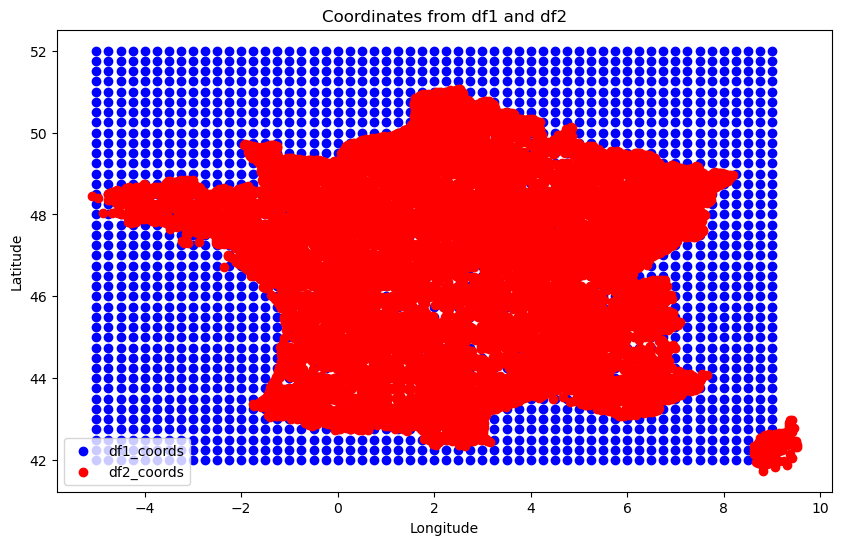

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the relevant columns into two separate DataFrames
df1_coords = df_far_sim_points[['latitude_1', 'longitude_1']].drop_duplicates().reset_index(drop=True)
df2_coords = df_far_sim_points[['latitude_2', 'longitude_2']].drop_duplicates().reset_index(drop=True)

# Plot the coordinates on the same map with different colors
plt.figure(figsize=(10, 6))

# Plot df1_coords in blue
plt.scatter(df1_coords['longitude_1'], df1_coords['latitude_1'], color='blue', label='df1_coords')

# Plot df2_coords in red
plt.scatter(df2_coords['longitude_2'], df2_coords['latitude_2'], color='red', label='df2_coords')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates from df1 and df2')
plt.legend()

# Show the plot
plt.show()


In [31]:
import pandas as pd
import folium
from ipywidgets import interact
from IPython.display import display

# Define the function to plot the map
def plot_interactive_map(distance_threshold):
    # Filter the DataFrame based on the input distance threshold
    df_far_sim_points_filtered = df_weather_decrees[df_weather_decrees['distance_km'] <= distance_threshold][['insee_2', 'latitude_1', 'longitude_1', 'latitude_2', 'longitude_2', 'distance_km']]
    
    # Extract the relevant coordinates
    df1_coords = df_far_sim_points_filtered[['latitude_1', 'longitude_1']].drop_duplicates().reset_index(drop=True)
    df2_coords = df_far_sim_points_filtered[['latitude_2', 'longitude_2']].drop_duplicates().reset_index(drop=True)

    # Set the initial location for the map to be the mean latitude and longitude from the filtered DataFrame
    mean_latitude = df1_coords['latitude_1'].mean() if not df1_coords.empty else 48.8566  # default to Paris if empty
    mean_longitude = df1_coords['longitude_1'].mean() if not df1_coords.empty else 2.3522  # default to Paris if empty

    # Create a Folium map centered on the mean coordinates
    m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=6)

    # Plot df1_coords in blue on the map
    for i, row in df1_coords.iterrows():
        folium.CircleMarker(
            location=[row['latitude_1'], row['longitude_1']],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"df1_coords: ({row['latitude_1']}, {row['longitude_1']})"
        ).add_to(m)

    # Plot df2_coords in red on the map
    for i, row in df2_coords.iterrows():
        folium.CircleMarker(
            location=[row['latitude_2'], row['longitude_2']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f"df2_coords: ({row['latitude_2']}, {row['longitude_2']})"
        ).add_to(m)

    # Display the map
    display(m)

# Create an interactive slider to adjust the distance threshold
interact(plot_interactive_map, distance_threshold=(0, 400, 5))


interactive(children=(IntSlider(value=200, description='distance_threshold', max=400, step=5), Output()), _dom…

<function __main__.plot_interactive_map(distance_threshold)>

In [32]:
# so proud of myself ^^

In [33]:
df_weather_decrees.isna().sum().sum()

0

In [34]:
df_weather_decrees['year_1'].nunique()

35

In [35]:
df_weather_decrees['year_2'].nunique()

35

### Note

>We will retain simupoints located within 25km of a commune’s geographical center.

### Save weather_decrees data

In [36]:
max_distance_mesure_location_km = 25

In [37]:
df_to_save = df_weather_decrees[df_weather_decrees['distance_km'] <= max_distance_mesure_location_km] # save to parquet

In [38]:

df_to_save.to_parquet(os.path.join(processed_data_folder_name, weather_decrees_filename))
# Save the schema (data types) to a file
df_to_save.dtypes.to_csv(os.path.join(processed_data_folder_name, weather_decrees_shema))

## Test reloading

In [39]:
# test reloading the dataframe from parquet
import pandas as pd

df_reloaded = pd.read_parquet(os.path.join(processed_data_folder_name, weather_decrees_filename))




In [40]:
os.path.join(processed_data_folder_name, weather_decrees_shema)

'./../../data/processed/weather_decrees.csv'

In [41]:
# Load the schema (data types) from the file
schema = pd.read_csv(os.path.join(processed_data_folder_name, weather_decrees_shema), index_col=0).squeeze("columns")

In [42]:
# Apply the schema to the loaded dataframe
df_reloaded = df_reloaded.astype(schema.to_dict())

In [43]:
df_reloaded.equals(df_to_save)

True

In [44]:
# Check if dtypes are the same
assert df_reloaded.equals(df_to_save), "Data types do not match!"